In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [2]:
xl = pd.ExcelFile("./data/Beauty_5.xlsx")

In [112]:
df = xl.parse()
df = df.dropna()

In [114]:
df.head()

,order,reviewrID,asin,reviewerName,helpful,out of,"reviewText""",overall,summary,unixReviewTime,reviewTime
0,1,A1YJEY40YUW4SE,7806397051,Andrea,3,4.0,Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1.391040e+09,"01 30,2014"
1,2,A60XNB876KYML,7806397051,Jessica H.,1,1.0,This palette was a decent price and I was look...,3,OK Palette!,1.397779e+09,"04 18,2014"
2,3,A3G6XNM240RMWA,7806397051,Karen,0,1.0,The texture of this concealer pallet is fantas...,4,great quality,1.378426e+09,"09 6,2013"
3,4,A1PQFP6SAJ6D80,7806397051,Norah,2,2.0,I really can't tell what exactly this thing is...,2,Do not work on my face,1.386461e+09,"12 8,2013"
4,5,A38FVHZTNQ271F,7806397051,Nova Amor,0,0.0,"It was a little smaller than I expected,but th...",3,It's okay.,1.382141e+09,"10 19,2013"


In [115]:
x = df.drop(['overall'], axis=1)
y = df['overall']

# Trying first 1000 examples for now
x_train, x_test, y_train, y_test = train_test_split(x[0:100000],
                                                    y[0:100000],
                                                    test_size=0.3)

In [116]:
def convert_to_numeric(x):
    if type(x) == int:
        return x
    else:
        return 3
    
y_train = y_train.apply(convert_to_numeric)
y_test = y_test.apply(convert_to_numeric)

In [117]:
# Train the pipeline
vectorizer = CountVectorizer(stop_words='english')
svc = LinearSVC()

text_pipe = make_pipeline(vectorizer, svc)
text_pipe.fit(x_train['reviewText"'], np.array(y_train))

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='engl...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [118]:
# Predict some ratings
text_pipe.score(x_test['reviewText"'], y_test)

0.61333333333333329

In [119]:
# Get top words for classes
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-20:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))

In [120]:
print_top10(vectorizer, svc, [0,1,2,3,4])

0: impede vowed cinnimon paled booth poodle gots breakable tuscan roof reviewi antiaging opionion smeer danduff compressed philippines vasodilation gouging recommendaveeno
1: linesi liable restocking quailty jewels zilch pry regulator bioglycolic 1l enchances ymmv mags internation madei unwarranted scrab caters repackage costuming
2: quimica foreverrrrrrr upnote pcons removeradding crackling turmeric 2inch glycolc ovrer rudolf sheesh assumption circulating scratchier sheepishly mobile disappointments reboost cartier
3: vainer malformed imoupdate prospective planes suffices steals stinkin cv tremors detaingling oversaturate tapes shhhhh travelled freshner spinner delays dependent igetitdoneright
4: inaccurate mybeautycenter c20 poundsthat damned noticeabley maneuverable flab bis scrolled freakish dreams preschool formidable 13been tast thatbut clapping unboxing mentholatum


In [121]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_[0]
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

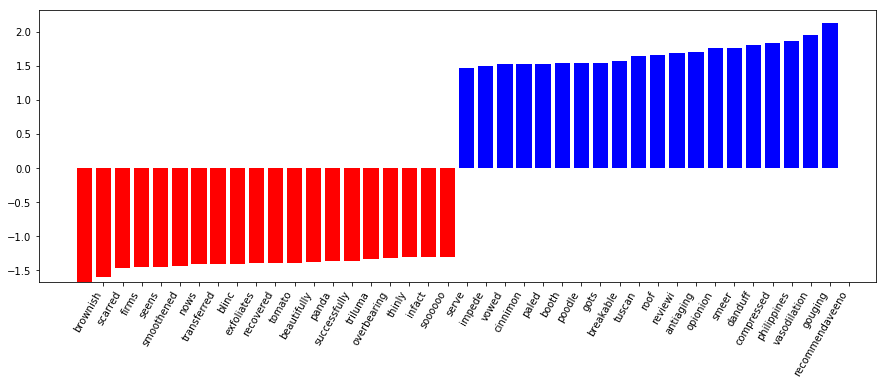

In [124]:
plot_coefficients(svc, vectorizer.get_feature_names())

In [123]:
print len(vectorizer.vocabulary_)
print len(vectorizer.get_feature_names())
print len(svc.coef_[0]) # Why are there 5 sets of coefficients?

45973
45973
45973
